In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
data = pd.read_csv('/Users/bobyan/Desktop/Kaggle Datasets/train.csv').values

In [56]:
m = data.shape[0]
n = data.shape[1] - 1  # number of features (784)

Y_all = data[:, 0].astype(int)             # labels (0–9)
X_all = (data[:, 1:].T) / 255.0            # normalize pixels, shape (784, m)

# Split: first 1000 dev, rest train
X_dev, Y_dev = X_all[:, :1000], Y_all[:1000]
X_train, Y_train = X_all[:, 1000:], Y_all[1000:]


In [57]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # stability trick
    return expZ / expZ.sum(axis=0, keepdims=True)


In [58]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    n_classes = Y.max() + 1
    one_hot_Y = np.zeros((n_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)               # (10, m)

    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


# -------------------
# 4. Update
# -------------------
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [59]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)



In [60]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration {i} → Training Accuracy: {acc:.4f}")

    return W1, b1, W2, b2

In [61]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=500)

# Dev set evaluation
_, _, _, A2_dev = forward_prop(W1, b1, W2, b2, X_dev)
dev_preds = get_predictions(A2_dev)
print("Dev set accuracy:", get_accuracy(dev_preds, Y_dev))

Iteration 0 → Training Accuracy: 0.0924
Iteration 50 → Training Accuracy: 0.2452
Iteration 100 → Training Accuracy: 0.4828
Iteration 150 → Training Accuracy: 0.7061
Iteration 200 → Training Accuracy: 0.7871
Iteration 250 → Training Accuracy: 0.8231
Iteration 300 → Training Accuracy: 0.8472
Iteration 350 → Training Accuracy: 0.8653
Iteration 400 → Training Accuracy: 0.8788
Iteration 450 → Training Accuracy: 0.8868
Dev set accuracy: 0.898


In [62]:
def test_predictions(indices, W1, b1, W2, b2):
    plt.figure(figsize=(15, 3))  # wide figure for 5 images
    
    for i, index in enumerate(indices):
        current_image = X_train[:, index, None]
        prediction = make_predictions(current_image, W1, b1, W2, b2)
        label = Y_train[index]
        
        # reshape image for display
        image_display = current_image.reshape((28, 28)) * 255
        
        # plot image
        plt.subplot(1, 5, i+1)  # 1 row, 5 columns
        plt.imshow(image_display, cmap="gray", interpolation='nearest')
        plt.title(f"P: {prediction[0]}\nL: {label}")
        plt.axis("off")
    
    plt.show()


Prediction: [3] 
 Label: 3


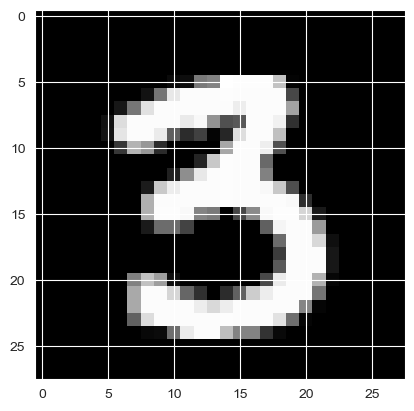

In [71]:
test_prediction(1021, W1, b1, W2, b2)

In [73]:
def test_random_predictions(W1, b1, W2, b2, num_images=5):
    indices = np.random.choice(X_train.shape[1], num_images, replace=False)
    plt.figure(figsize=(15, 3))
    
    for i, index in enumerate(indices):
        current_image = X_train[:, index, None]
        prediction = make_predictions(current_image, W1, b1, W2, b2)
        label = Y_train[index]
        
        image_display = current_image.reshape((28, 28)) * 255
        
        plt.subplot(1, num_images, i+1)
        plt.imshow(image_display, cmap="gray", interpolation='nearest')
        plt.title(f"P: {prediction[0]}\nL: {label}")
        plt.axis("off")
    plt.show()


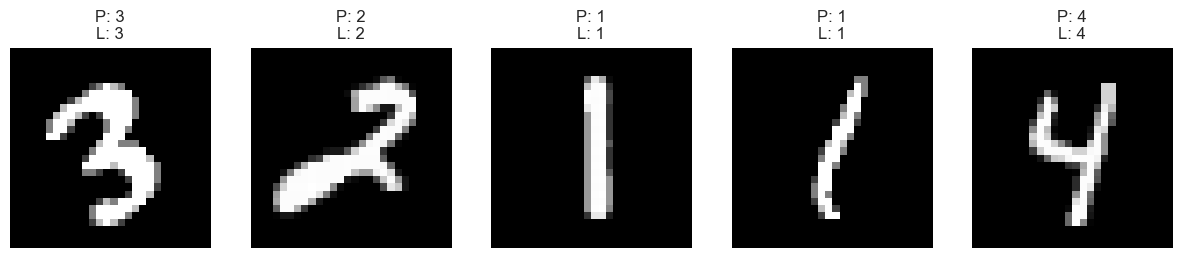

In [75]:
test_random_predictions(W1, b1, W2, b2)
